# Notebook per estrazione dei risultati completi delle due pipeline

## Funzioni per estrazione punteggi e visualizzazione

In [69]:
import json
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

In [70]:
from collections import Counter

def extract_score(json_file, criterion):
    """
    Funzione che estrae i punteggi da un file JSON e calcola la statistica dei voti (1, 2, 3, 4, 5).

    :param json_file: Path del file JSON con le risposte e i punteggi.
    :param criterion: Il criterio di valutazione ('correctness', 'completeness', ecc.).
    :return: Dizionario con la distribuzione dei punteggi.
    """
    with open(json_file, "r") as file:
        data = json.load(file)

    score_key = f"{criterion}_score"

    scores = [item[score_key] for item in data if item.get(score_key) is not None]

    score_distribution = Counter(scores)

    print(f"Distribuzione dei punteggi per il criterio '{criterion}':")
    for score in range(1, 6):
        print(f"Punteggio {score}: {score_distribution.get(score, 0)} occorrenze")

    return dict(score_distribution)

In [71]:
def extract_average_score(json_file, criterion):
    """
    Funzione che estrae i punteggi da un file JSON e calcola la media dei voti (1, 2, 3, 4, 5).

    :param json_file: Path del file JSON con le risposte e i punteggi.
    :param criterion: Il criterio di valutazione ('correctness', 'completeness', ecc.).
    :return: Media dei punteggi.
    """
    with open(json_file, "r") as file:
        data = json.load(file)

    score_key = f"{criterion}_score"

    scores = [item[score_key] for item in data if item.get(score_key) is not None]

    if scores:
        average_score = sum(scores) / len(scores)
        return average_score
    else:
        print(f"Nessun punteggio trovato per il criterio '{criterion}' nel file {json_file}")
        return None

In [72]:
def calculate_final_score():
    local_averages, global_averages = calculate_average_for_local_and_global()

    final_scores = {}
    for criterion in local_averages.keys():
        if local_averages[criterion] is not None and global_averages[criterion] is not None:
            final_scores[criterion] = (local_averages[criterion] + global_averages[criterion]) / 2
        else:
            final_scores[criterion] = None  

    return final_scores

## 1. GraphRAG

In [73]:
def calculate_average_for_local_and_global():

    gr_local_files = {
        "correctness": "gr_local_results/gr_results_correctness.json",
        "completeness": "gr_local_results/gr_results_completeness.json",
        "relevance": "gr_local_results/gr_results_relevance.json"
    }

    gr_global_files = {
        "correctness": "gr_global_results/gr_results_correctness.json",
        "completeness": "gr_global_results/gr_results_completeness.json",
        "relevance": "gr_global_results/gr_results_relevance.json"
    }

    local_averages = {criterion: extract_average_score(path, criterion) for criterion, path in gr_local_files.items()}
    
    global_averages = {criterion: extract_average_score(path, criterion) for criterion, path in gr_global_files.items()}

    return local_averages, global_averages

In [74]:
final_scores = calculate_final_score()
print("Punteggi finali medi tra domande locali e globali della pipeline di GraphRAG:")
for criterion, score in final_scores.items():
    if score is not None:
        print(f"{criterion.capitalize()}: {score:.2f}")
    else:
        print(f"{criterion.capitalize()}: Non disponibile")

Punteggi finali medi tra domande locali e globali della pipeline di GraphRAG:
Correctness: 2.77
Completeness: 2.96
Relevance: 3.76


## 2. RAG Tradizionale

In [75]:
def calculate_average_for_local_and_global():

    gr_local_files = {
        "correctness": "naive_local_results/naive_results_correctness.json",
        "completeness": "naive_local_results/naive_results_completeness.json",
        "relevance": "naive_local_results/naive_results_relevance.json"
    }

    gr_global_files = {
        "correctness": "naive_global_results/naive_results_correctness.json",
        "completeness": "naive_global_results/naive_results_completeness.json",
        "relevance": "naive_global_results/naive_results_relevance.json"
    }

    local_averages = {criterion: extract_average_score(path, criterion) for criterion, path in gr_local_files.items()}
    
    global_averages = {criterion: extract_average_score(path, criterion) for criterion, path in gr_global_files.items()}

    return local_averages, global_averages

In [76]:
final_scores_naive = calculate_final_score()
print("Punteggi finali medi tra domande locali e globali della pipeline di RAG tradizionale:")
for criterion, score in final_scores_naive.items():
    if score is not None:
        print(f"{criterion.capitalize()}: {score:.2f}")
    else:
        print(f"{criterion.capitalize()}: Non disponibile")

Punteggi finali medi tra domande locali e globali della pipeline di RAG tradizionale:
Correctness: 2.77
Completeness: 2.78
Relevance: 3.56


## 3. Pipeline mista

In [77]:
def calculate_average_for_local_and_global():

    gr_local_files = {
        "correctness": "hybrid_local_results/hybrid_results_correctness.json",
        "completeness": "hybrid_local_results/hybrid_results_completeness.json",
        "relevance": "hybrid_local_results/hybrid_results_relevance.json"
    }

    gr_global_files = {
        "correctness": "hybrid_global_results/hybrid_results_correctness.json",
        "completeness": "hybrid_global_results/hybrid_results_completeness.json",
        "relevance": "hybrid_global_results/hybrid_results_relevance.json"
    }

    local_averages = {criterion: extract_average_score(path, criterion) for criterion, path in gr_local_files.items()}
    
    global_averages = {criterion: extract_average_score(path, criterion) for criterion, path in gr_global_files.items()}

    return local_averages, global_averages

In [78]:
final_scores_hybrid = calculate_final_score()
print("Punteggi finali medi tra domande locali e globali della pipeline con classificatore di domande:")
for criterion, score in final_scores_hybrid.items():
    if score is not None:
        print(f"{criterion.capitalize()}: {score:.2f}")
    else:
        print(f"{criterion.capitalize()}: Non disponibile")

Punteggi finali medi tra domande locali e globali della pipeline con classificatore di domande:
Correctness: 3.22
Completeness: 3.33
Relevance: 4.54


## Confronto finale

In [79]:
data = {
    "Criterion": ["Correctness", "Completeness", "Relevance"],
    "GraphRAG": [final_scores.get("correctness"), final_scores.get("completeness"), final_scores.get("relevance")],
    "RAG Tradizionale": [final_scores_naive.get("correctness"), final_scores_naive.get("completeness"), final_scores_naive.get("relevance")],
    "Pipeline Ibrida": [final_scores_hybrid.get("correctness"), final_scores_hybrid.get("completeness"), final_scores_hybrid.get("relevance")]
}

df = pd.DataFrame(data)

print(df)

      Criterion  GraphRAG  RAG Tradizionale  Pipeline Ibrida
0   Correctness  2.769369          2.770270         3.218619
1  Completeness  2.964646          2.778078         3.333538
2     Relevance  3.761862          3.563964         4.543544


In [80]:
criteria = ["Correctness", "Completeness", "Relevance"]
graphRAG_scores = [final_scores.get("correctness"), final_scores.get("completeness"), final_scores.get("relevance")]
rag_trad_scores = [final_scores_naive.get("correctness"), final_scores_naive.get("completeness"), final_scores_naive.get("relevance")]
hybrid_scores = [final_scores_hybrid.get("correctness"), final_scores_hybrid.get("completeness"), final_scores_hybrid.get("relevance")]

num_vars = len(criteria)

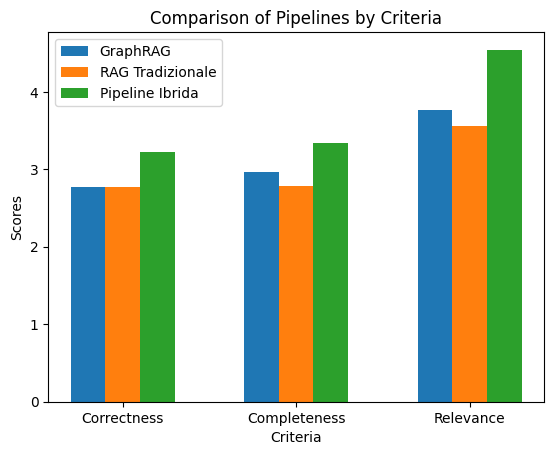

In [81]:
bar_width = 0.2
index = np.arange(len(criteria))

plt.bar(index, graphRAG_scores, bar_width, label="GraphRAG")
plt.bar(index + bar_width, rag_trad_scores, bar_width, label="RAG Tradizionale")
plt.bar(index + 2 * bar_width, hybrid_scores, bar_width, label="Pipeline Ibrida")

plt.xlabel('Criteria')
plt.ylabel('Scores')
plt.title('Comparison of Pipelines by Criteria')
plt.xticks(index + bar_width, criteria)
plt.legend()

plt.show()

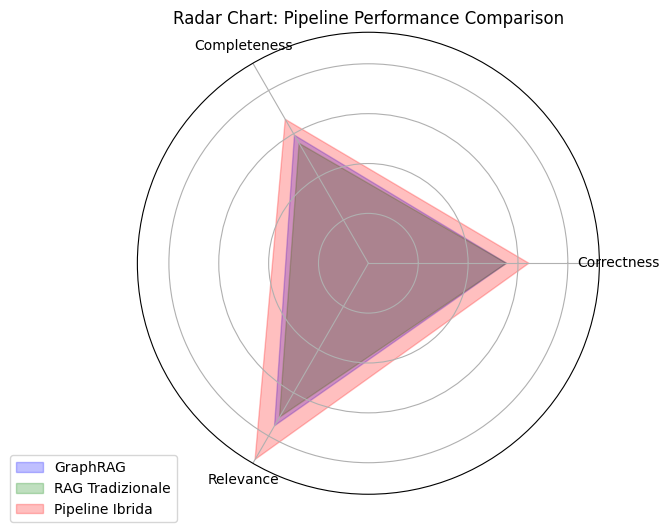

In [82]:
labels = ["Correctness", "Completeness", "Relevance"]
num_vars = len(labels)

scores_graphRAG = [final_scores.get("correctness"), final_scores.get("completeness"), final_scores.get("relevance")]
scores_rag_trad = [final_scores_naive.get("correctness"), final_scores_naive.get("completeness"), final_scores_naive.get("relevance")]
scores_hybrid = [final_scores_hybrid.get("correctness"), final_scores_hybrid.get("completeness"), final_scores_hybrid.get("relevance")]

scores_graphRAG += scores_graphRAG[:1]
scores_rag_trad += scores_rag_trad[:1]
scores_hybrid += scores_hybrid[:1]

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

ax.fill(angles, scores_graphRAG, color='blue', alpha=0.25, label='GraphRAG')
ax.fill(angles, scores_rag_trad, color='green', alpha=0.25, label='RAG Tradizionale')
ax.fill(angles, scores_hybrid, color='red', alpha=0.25, label='Pipeline Ibrida')

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title('Radar Chart: Pipeline Performance Comparison')

plt.show()